<h1 style='text-align: center; color: black; font-size: 4em'>Fake bills detection</h1>

<img src="https://assets.losspreventionmedia.com/uploads/2019/07/counterfeit-money-1280x720.jpg">

About Dataset

The dataset includes 1500 rows and 7 columns:

- is_genuine: boolean

- diagonal: float

- height_left: float

- height_right: float

- margin_low: float

- margin_upper: float

- length: float

Idea of projects with this dataset:

- Predicting the missing values with a linear regression or a KNN imputer

- Comparing classification such as logistic regression or KNN with an unsupervised model such as K-Means to predict the authenticity of the bills

- Trying to do a PCA or a Kernel Transform to create a clearer separation between the Genuine and Fake Bills

In [4]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("D:/Project/Fake_Bill_Detections/Fake_Bill_Detect_Project/fake_bills.csv",sep = ";")
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


### Missing values

In [8]:
# Total no of missing value
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [9]:
# missing value in percentage
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      2.466667
margin_up       0.000000
length          0.000000
dtype: float64

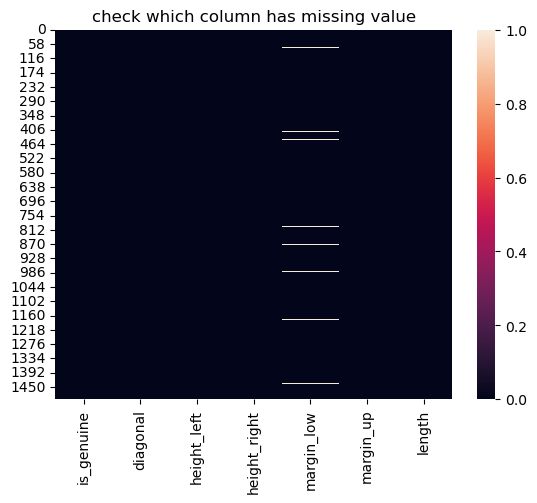

In [10]:
sns.heatmap(df.isnull())
plt.title('check which column has missing value')
plt.show()

### Predicting missing value with the help of linear regression

In [11]:
# step 1) seperate null values from dataset and it's consider as test data
test = df[df['margin_low'].isnull()]
test['margin_low']

72     NaN
99     NaN
151    NaN
197    NaN
241    NaN
251    NaN
284    NaN
334    NaN
410    NaN
413    NaN
445    NaN
481    NaN
505    NaN
611    NaN
654    NaN
675    NaN
710    NaN
739    NaN
742    NaN
780    NaN
798    NaN
844    NaN
845    NaN
871    NaN
895    NaN
919    NaN
945    NaN
946    NaN
981    NaN
1076   NaN
1121   NaN
1176   NaN
1303   NaN
1315   NaN
1347   NaN
1435   NaN
1438   NaN
Name: margin_low, dtype: float64

In [12]:
# step 2) drop null value from dataset and it's consider as train data
train = df.dropna(inplace = True)
train

In [13]:
# step 3) creating 'X_train' and 'y_train' from train data

# X_train means in df['margin_low'] except the non null value
X_train = df.drop('margin_low',axis = 1)


# y_train means in df['margin_low'] non null value
y_train = df['margin_low']

# creating x_test from test data
# X_test means in df['margin_low'] except the null values
X_test = test.drop("margin_low",axis = 1)

In [14]:
# step 4) building linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# train the model on test data
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
# step 5) applying model on x_test and predict missing value
y_pred = lr.predict(X_test)

In [16]:
y_pred

array([4.06495361, 4.11199026, 4.13400328, 3.99357074, 4.1403993 ,
       4.09428392, 4.07412432, 4.12538999, 4.0807278 , 4.07363322,
       4.11897255, 4.18037978, 4.13648423, 4.05106842, 4.17837685,
       4.22555104, 4.11586845, 4.10284101, 4.08184346, 4.09276238,
       4.11250192, 4.15717623, 4.16028787, 4.12193808, 4.12353555,
       4.19842271, 4.10962313, 4.09696025, 4.13384101, 5.25968515,
       5.264817  , 5.28251853, 5.30206887, 5.20035843, 5.1754678 ,
       5.17345045, 5.24675055])

In [17]:
y_pred.shape

(37,)

In [18]:
# step 6) replace the missing value with predict value

test.loc[test.margin_low.isnull(),"margin_low"] = y_pred

In [19]:
# all missing value replace with predict value
test['margin_low']

72      4.064954
99      4.111990
151     4.134003
197     3.993571
241     4.140399
251     4.094284
284     4.074124
334     4.125390
410     4.080728
413     4.073633
445     4.118973
481     4.180380
505     4.136484
611     4.051068
654     4.178377
675     4.225551
710     4.115868
739     4.102841
742     4.081843
780     4.092762
798     4.112502
844     4.157176
845     4.160288
871     4.121938
895     4.123536
919     4.198423
945     4.109623
946     4.096960
981     4.133841
1076    5.259685
1121    5.264817
1176    5.282519
1303    5.302069
1315    5.200358
1347    5.175468
1435    5.173450
1438    5.246751
Name: margin_low, dtype: float64

In [20]:
# checking missing values

df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

### Exploratory data analysis

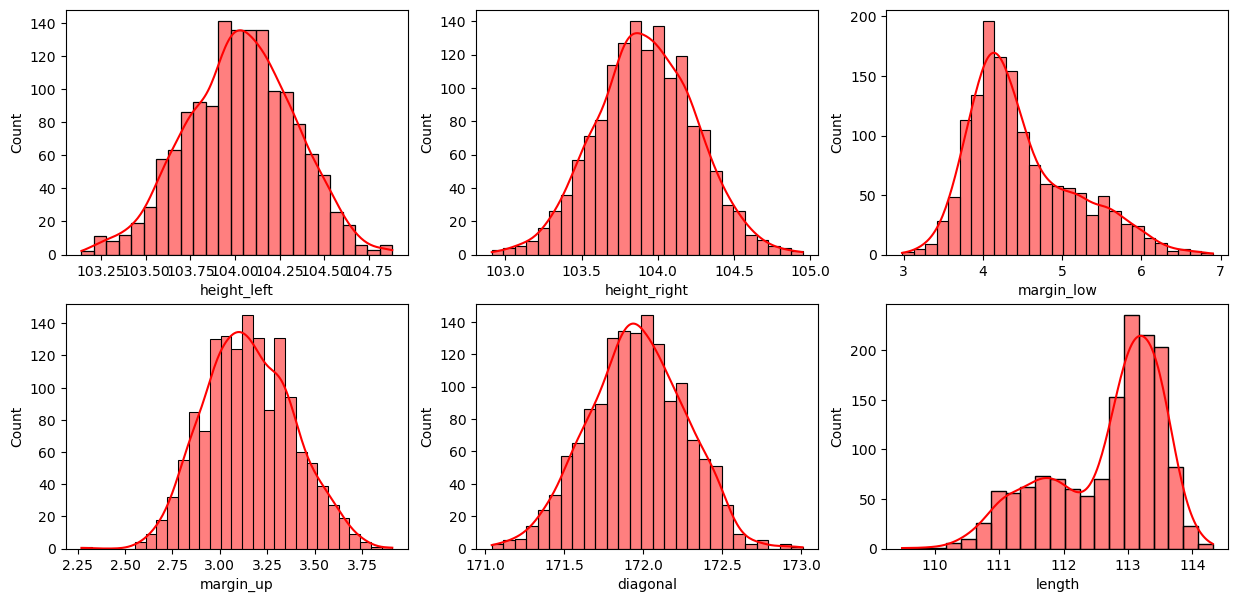

In [21]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.histplot(data = df,x = "height_left",kde = True,ax = axes[0,0],color='red')
fig2 = sns.histplot(data = df,x = "height_right",kde = True,ax = axes[0,1],color='red')
fig3 = sns.histplot(data = df,x = "margin_low",kde = True,ax = axes[0,2],color='red')
fig4 = sns.histplot(data = df,x = "margin_up",kde = True,ax = axes[1,0],color='red')
fig5 = sns.histplot(data = df,x = "diagonal",kde = True,ax = axes[1,1],color='red')
fig6 = sns.histplot(data = df,x = "length",kde = True,ax = axes[1,2],color='red')
plt.show()

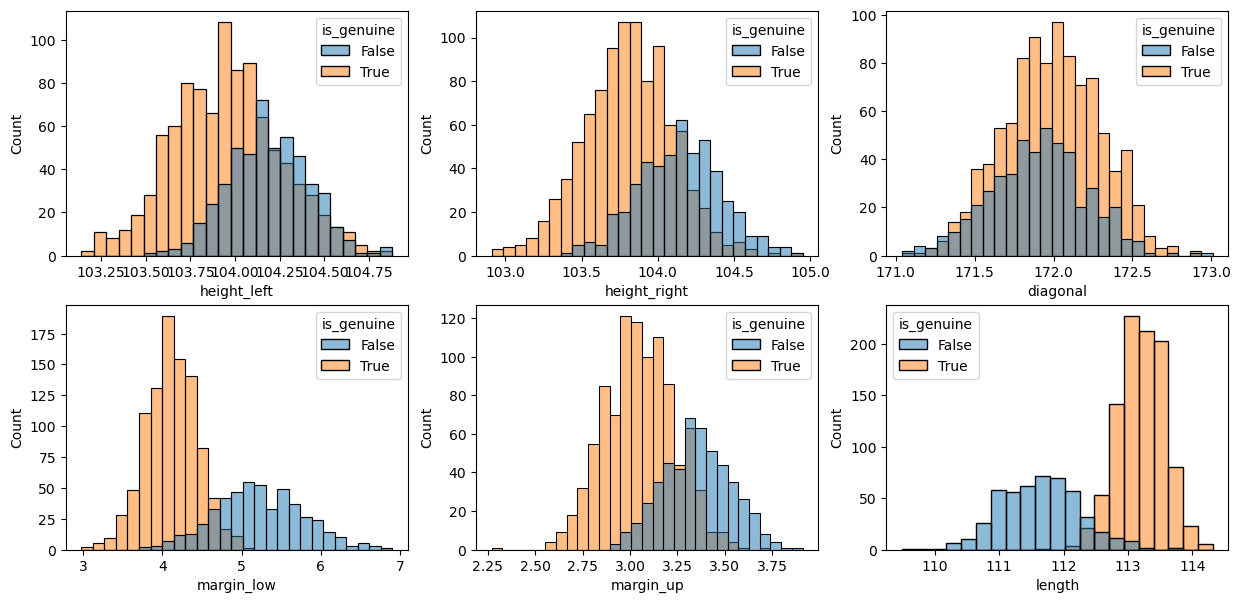

In [22]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.histplot(data = df,x = "height_left",hue = 'is_genuine',ax = axes[0,0])
fig2 = sns.histplot(data = df,x = "height_right",hue = 'is_genuine',ax = axes[0,1])
fig3 = sns.histplot(data = df,x = "diagonal",hue = 'is_genuine',ax = axes[0,2])
fig4 = sns.histplot(data = df,x = "margin_low",hue = 'is_genuine',ax = axes[1,0])
fig5 = sns.histplot(data = df,x = "margin_up",hue = 'is_genuine',ax = axes[1,1])
fig6 = sns.histplot(data = df,x = "length",hue = 'is_genuine',ax = axes[1,2])
plt.show()

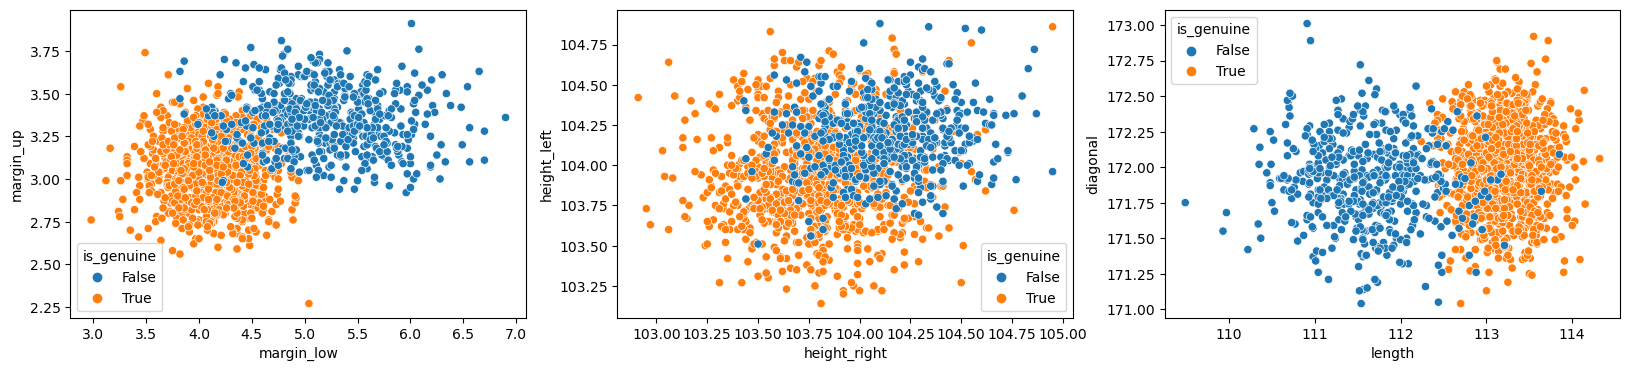

In [23]:
fig,axes = plt.subplots(1,3,figsize=(20,4))
fig1 = sns.scatterplot(data = df, x = "margin_low",y = "margin_up",hue = "is_genuine",ax=axes[0])
fig1 = sns.scatterplot(data = df, x = "height_right",y = "height_left",hue = "is_genuine",ax=axes[1])
fig1 = sns.scatterplot(data = df, x = "length",y = "diagonal",hue = "is_genuine",ax=axes[2])
plt.show()

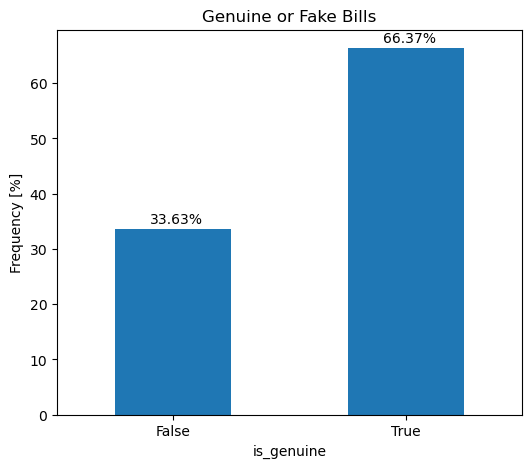

In [24]:
plt.figure(figsize=(6,5))
plt.title('Genuine or Fake Bills')
plt.xlabel('is_genuine')
plt.ylabel('Frequency [%]')

ax = (df.is_genuine.value_counts()/len(df)*100).sort_index().plot(kind="bar", rot=0)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

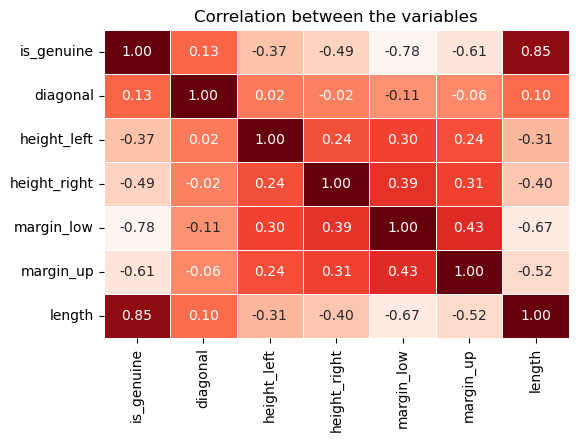

In [25]:
corr = df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Reds',linewidths=0.5)
plt.title('Correlation between the variables')
plt.show()

### Machine Learning
### Comparing classification models with an unsupervised model to predict the authenticity of the bills

In [26]:
# import library
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### 1) Logistic Regression with k-means clustering 

In [27]:
# Cluster the dataset using KMeans
kmeans = KMeans(n_clusters=2, random_state=42)#value for k = 2 
df['cluster'] = kmeans.fit_predict(df[['length', 'margin_low']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['length','margin_low','cluster']],df['is_genuine'],test_size=0.30,random_state=42) # data for training model 30%

In [28]:
# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Test the model
y_pred = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred)

print(f'Accuracy_logreg: {accuracy_logreg} ')

Accuracy_logreg: 0.9908883826879271 


In [29]:
print('Accuracy is: ', accuracy_logreg*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

precision_logreg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_logreg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_logreg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_logreg = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  99.08883826879271
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       148
        True       0.99      1.00      0.99       291

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439

[[145   3]
 [  1 290]]


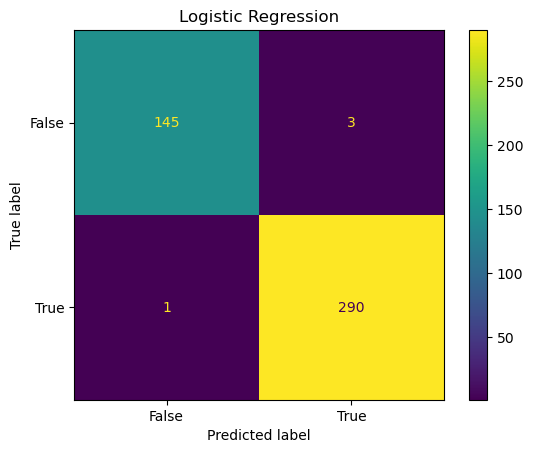

Accuracy_logreg: 0.99


In [30]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Logistic Regression')
plt.show()
print(f'Accuracy_logreg: {accuracy_logreg}')

##### 2) KNN Model

In [31]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Test the model
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)

print(f'Accuracy_knn: {accuracy_knn}')

Accuracy_knn: 0.9931662870159453


In [32]:
print('Accuracy is: ', accuracy_knn *100)

print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  99.31662870159454
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       148
        True       0.99      1.00      0.99       291

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439

[[146   2]
 [  1 290]]


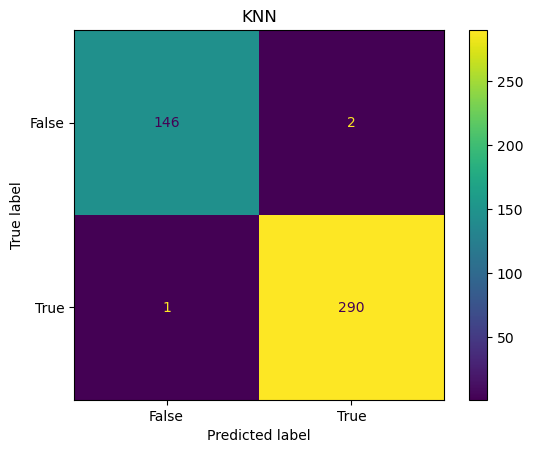

Accuracy_knn: 0.99


In [33]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('KNN')
plt.show()
print(f'Accuracy_knn: {accuracy_knn}')

##### 3) Decision tree classifier

In [34]:
# Train the model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Test the model
y_pred = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred)

print(f'Accuracy_dtc: {accuracy_dtc}')

Accuracy_dtc: 0.9863325740318907


In [35]:
print('Accuracy is: ', accuracy_dtc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_dtc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_dtc= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_dtc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_dtc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  98.63325740318906
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       148
        True       0.99      0.99      0.99       291

    accuracy                           0.99       439
   macro avg       0.98      0.98      0.98       439
weighted avg       0.99      0.99      0.99       439

[[145   3]
 [  3 288]]


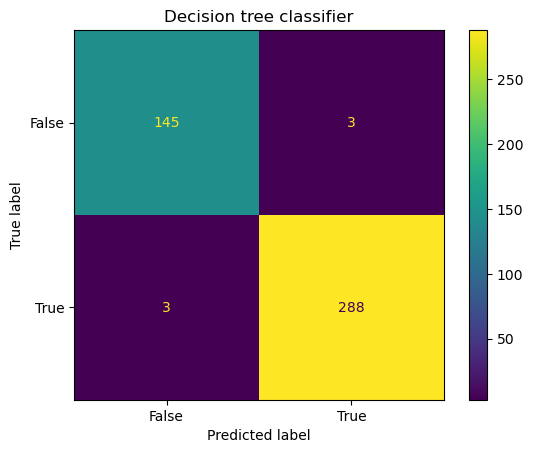

Accuracy_dtc: 0.99


In [36]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Decision tree classifier')
plt.show()
print(f'Accuracy_dtc: {accuracy_dtc}')

##### 4) Random Forest Classifier

In [37]:
rfc = RandomForestClassifier()
# Train the model
rfc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Test the model
y_pred = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred)

print(f'Accuracy_rfc: {accuracy_rfc}')

Accuracy_rfc: 0.9908883826879271


In [38]:
print('Accuracy is: ', accuracy_rfc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_rfc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_rfc = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_rfc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_rfc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  99.08883826879271
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       148
        True       0.99      0.99      0.99       291

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439

[[146   2]
 [  2 289]]


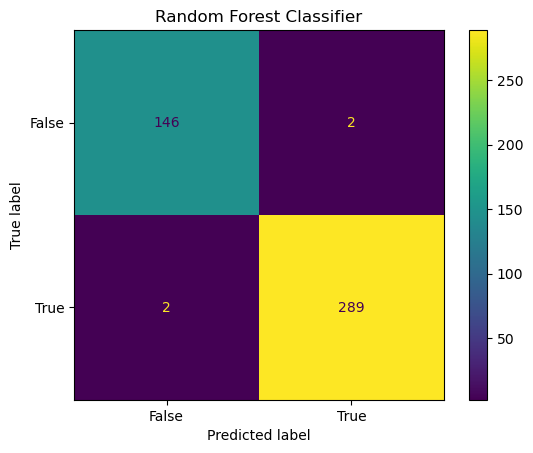

Accuracy_rfc: 0.99


In [39]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Random Forest Classifier')
plt.show()
print(f'Accuracy_rfc: {accuracy_rfc}')

##### 5) AdaBoost Classifier

In [40]:
abc = AdaBoostClassifier()

# Train the model
abc.fit(X_train, y_train)
abc.fit(X_train, y_train)

# Test the model
y_pred = abc.predict(X_test)
accuracy_abc = accuracy_score(y_test, y_pred)

print(f'Accuracy_abc: {accuracy_abc}')

Accuracy_abc: 0.9908883826879271


In [41]:
print('Accuracy is: ', accuracy_abc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_abc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_abc = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_abc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_abc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  99.08883826879271
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       148
        True       0.99      0.99      0.99       291

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439

[[146   2]
 [  2 289]]


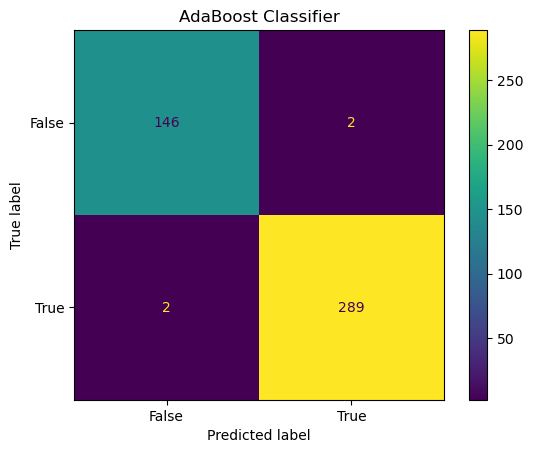

Accuracy_abc: 0.99


In [42]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('AdaBoost Classifier')
plt.show()
print(f'Accuracy_abc: {accuracy_abc}')

##### 6) GradientBoosting Classifier

In [43]:
gbc = GradientBoostingClassifier()

# Train the model
gbc.fit(X_train, y_train)
gbc.fit(X_train, y_train)

# Test the model
y_pred = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred)

print(f'Accuracy_gbc: {accuracy_gbc}')

Accuracy_gbc: 0.9863325740318907


In [44]:
print('Accuracy is: ', accuracy_gbc*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_gbc = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_gbc = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_gbc = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_gbc = round(accuracy_score(y_test,y_pred),2)

Accuracy is:  98.63325740318906
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       148
        True       0.99      0.99      0.99       291

    accuracy                           0.99       439
   macro avg       0.98      0.98      0.98       439
weighted avg       0.99      0.99      0.99       439

[[145   3]
 [  3 288]]


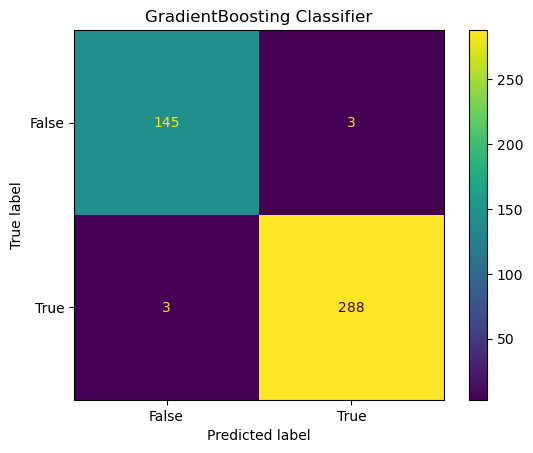

Accuracy_gbc: 0.99


In [45]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('GradientBoosting Classifier')
plt.show()
print(f'Accuracy_gbc: {accuracy_gbc}')

##### 7) Ensemble learning

In [46]:
# Create the base models
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()

# Create the ensemble model
ensemble = VotingClassifier(estimators=[('rfc', rfc), ('gbc', gbc), ('abc', abc)], voting='hard')

# Train the model
ensemble.fit(X_train, y_train)

# Test the model
y_pred = ensemble.predict(X_test)
accuracy_ens = accuracy_score(y_test, y_pred)

print(f'Accuracy_ens: {accuracy_ens}')

Accuracy_ens: 0.9931662870159453


In [47]:
print('Accuracy is: ', accuracy_ens*100)
print(classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

precision_ens = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_ens = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_ens = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_ens = accuracy_score(y_test,y_pred)

Accuracy is:  99.31662870159454
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       148
        True       0.99      1.00      0.99       291

    accuracy                           0.99       439
   macro avg       0.99      0.99      0.99       439
weighted avg       0.99      0.99      0.99       439

[[146   2]
 [  1 290]]


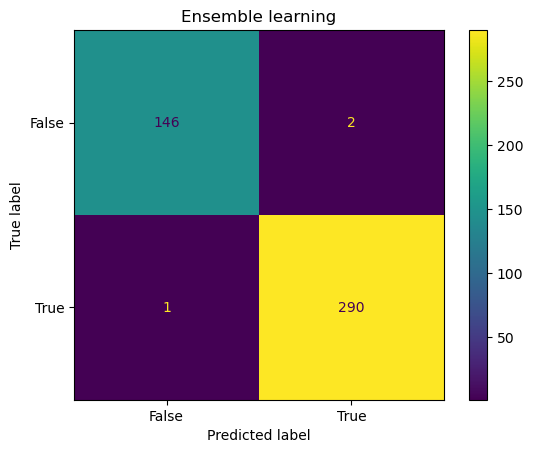

Accuracy_ens: 0.9931662870159453


In [48]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title('Ensemble learning')
plt.show()
print(f'Accuracy_ens: {accuracy_ens}')

### All models and their accuracy

In [49]:
Evaluation = {"Models":pd.Series(["Logistic Regression","KNN Classifier","DecisionTree Classifier","RandomForest Classifier",
                                  "AdaBoost Classifier","Gradient Boosting Classifier","Ensemble Classifier"]),\
        "Accuracy(%)":pd.Series([accuracy_logreg,accuracy_knn,accuracy_dtc,accuracy_rfc,accuracy_abc,accuracy_gbc,accuracy_ens]),\
             "Precision(%)":pd.Series([precision_logreg,precision_knn,precision_dtc,precision_rfc,precision_abc,precision_gbc,precision_ens]),\
             "Recall(%)":pd.Series([recall_logreg,recall_knn,recall_dtc,recall_rfc,recall_abc,recall_gbc,recall_ens]),\
             "F1-Score(%)":pd.Series([f1_logreg,f1_knn,f1_dtc,f1_rfc,f1_abc,f1_gbc,f1_ens])}
table = pd.DataFrame(Evaluation)
table

,Models,Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,Logistic Regression,0.990000,0.99,0.99,0.99
1,KNN Classifier,0.990000,0.99,0.99,0.99
2,DecisionTree Classifier,0.990000,0.98,0.98,0.98
3,RandomForest Classifier,0.990000,0.99,0.99,0.99
4,AdaBoost Classifier,0.990000,0.99,0.99,0.99
5,Gradient Boosting Classifier,0.990000,0.98,0.98,0.98
6,Ensemble Classifier,0.993166,0.99,0.99,0.99


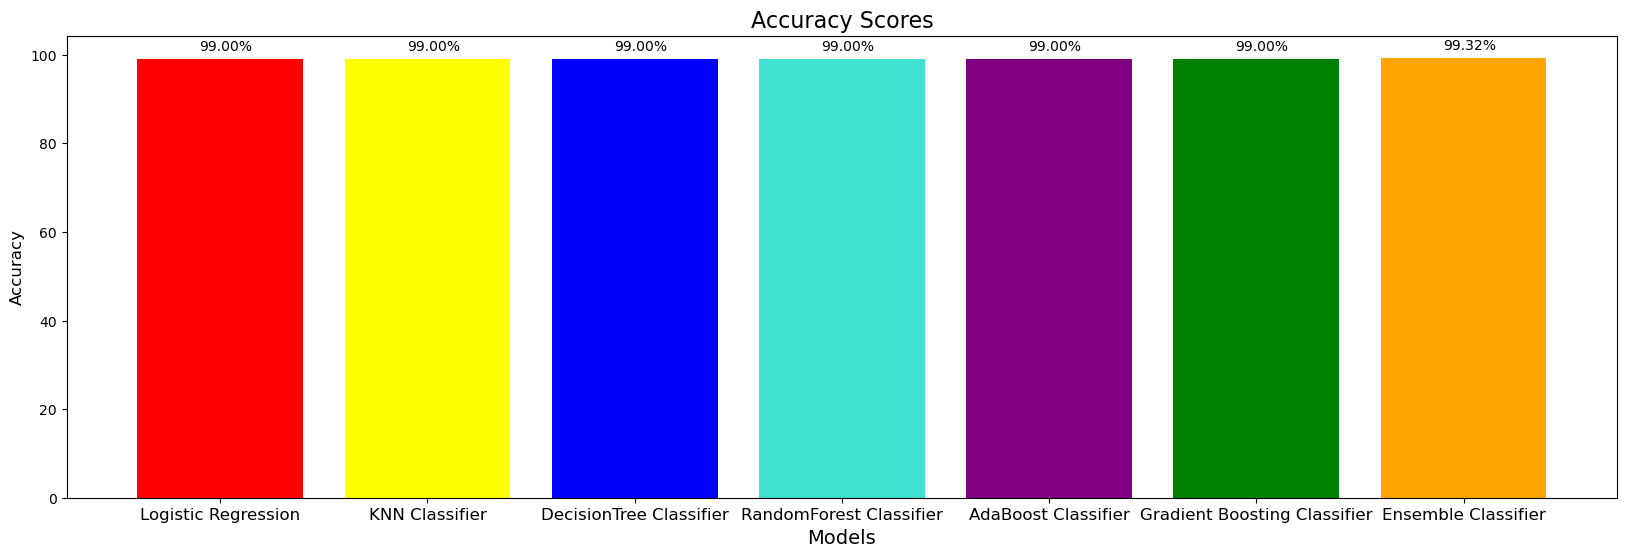

In [50]:
from matplotlib.cm import rainbow

model_names = ["Logistic Regression","KNN Classifier","DecisionTree Classifier","RandomForest Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Ensemble Classifier"]
accuracies = [accuracy_logreg*100,accuracy_knn*100,accuracy_dtc*100,accuracy_rfc*100,accuracy_abc*100,accuracy_gbc*100,accuracy_ens*100]


plt.figure(figsize = (20,6))
colors = rainbow(np.linspace(0, 1),len(Evaluation))
barplot = plt.bar(model_names,accuracies,color =['red','yellow','blue','turquoise','purple','Green','Orange'])
plt.xticks(fontsize = 12)
#plt.xticks(rotation=45)
plt.xlabel("Models", fontsize = 14)
plt.ylabel("Accuracy", fontsize = 12)
plt.title("Accuracy Scores", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,s = '{:.2f}%'.format(accuracies[i]),fontsize = 10)

### PCA for clear separation between the Genuine and Fake Bills

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [52]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1


In [53]:
df=df.drop(['cluster'],axis=1)

In [54]:
Fake_Bill = df.drop(['is_genuine'],axis=1)

In [55]:
# Converting data to numpy array
Fake_bill_arr = df.values
Fake_bill_arr

array([[True, 171.81, 104.86, ..., 4.52, 2.89, 112.83],
       [True, 171.46, 103.36, ..., 3.77, 2.99, 113.09],
       [True, 172.69, 104.48, ..., 4.4, 2.94, 113.16],
       ...,
       [False, 171.8, 104.01, ..., 5.51, 3.36, 111.95],
       [False, 172.06, 104.28, ..., 5.17, 3.46, 112.25],
       [False, 171.47, 104.15, ..., 4.63, 3.37, 112.07]], dtype=object)

In [56]:
# Normalizing the numerical data 
df1 = scale(Fake_bill_arr)
df1

array([[ 0.71182451, -0.48859357,  2.76680735, ...,  0.05128623,
        -1.13698239,  0.17784229],
       [ 0.71182451, -1.63480853, -2.24148961, ..., -1.07893701,
        -0.7048056 ,  0.47569209],
       [ 0.71182451,  2.39331832,  1.49803879, ..., -0.12954949,
        -0.92089399,  0.55588243],
       ...,
       [-1.40484064, -0.52134257, -0.07122759, ...,  1.5431809 ,
         0.89424851, -0.83026476],
       [-1.40484064,  0.3301314 ,  0.83026586, ...,  1.03081304,
         1.32642529, -0.4865919 ],
       [-1.40484064, -1.60205953,  0.39621346, ...,  0.2170523 ,
         0.93746618, -0.69279562]])

In [57]:
# no of components 6 because in this dataset 6 columns
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(df1)
pca_values

array([[ 0.94058691,  0.97697264,  2.60675898,  3.26096149, -0.14215909,
         0.06650097],
       [-2.05370389, -2.28000065, -1.02980067,  0.09935436, -0.02232739,
        -0.49295748],
       [-1.24220081,  2.58225953,  1.0556593 , -1.09035151,  0.88410073,
         0.20515675],
       ...,
       [ 2.35038411, -0.59455532, -0.52140759, -0.06704638,  0.23542214,
         0.50052009],
       [ 2.23257133,  0.51621114,  0.03800021, -0.46754243, -0.36192311,
         0.47043299],
       [ 1.61683811, -1.49255139,  0.47984592, -0.6752892 , -0.42440044,
        -0.32665532]])

In [58]:
var = pca.explained_variance_ratio_
var

array([0.4916298 , 0.14582988, 0.11361004, 0.10206929, 0.0845501 ,
       0.0466567 ])

In [59]:
var1 = np.cumsum(np.round(var,decimals = 8)*100)
print("The amount of variance that each PCA explains is ",var1)

The amount of variance that each PCA explains is  [49.16298  63.745968 75.106972 85.313901 93.768911 98.434581]


In [60]:
pca.components_

array([[-0.50959372, -0.07760618,  0.26189957,  0.32398479,  0.44605938,
         0.37534603, -0.46997913],
       [ 0.04478824,  0.92617432,  0.33654139,  0.14830364, -0.05828326,
         0.00712037,  0.03864494],
       [ 0.09023942, -0.32281112,  0.89905772, -0.11132977, -0.09039728,
        -0.20401052,  0.1309915 ],
       [ 0.09001619, -0.13560182, -0.05821825,  0.90000146, -0.07575041,
        -0.36262614,  0.15126596],
       [-0.14000035,  0.11266103, -0.07022993, -0.2143334 ,  0.48061401,
        -0.79488969, -0.23237234],
       [ 0.12565211,  0.00436965,  0.00413786,  0.00982772,  0.69199567,
         0.1939747 ,  0.68380886]])

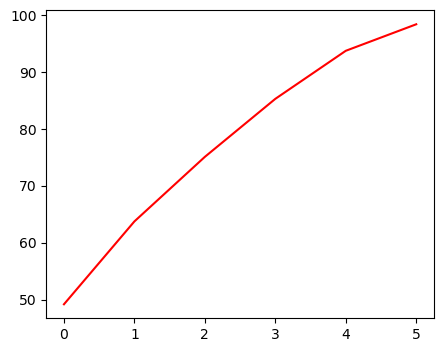

In [61]:
plt.figure(figsize=(5,4))
plt.plot(var1,color="red")
plt.show()

In [62]:
df_new = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['PC1','PC2']),df['is_genuine']],axis = 1)
df_new.head()

,PC1,PC2,is_genuine
0,0.940587,0.976973,True
1,-2.053704,-2.280001,True
2,-1.242201,2.582260,True
3,-1.561929,-1.804777,True
4,-0.245312,-0.551793,True


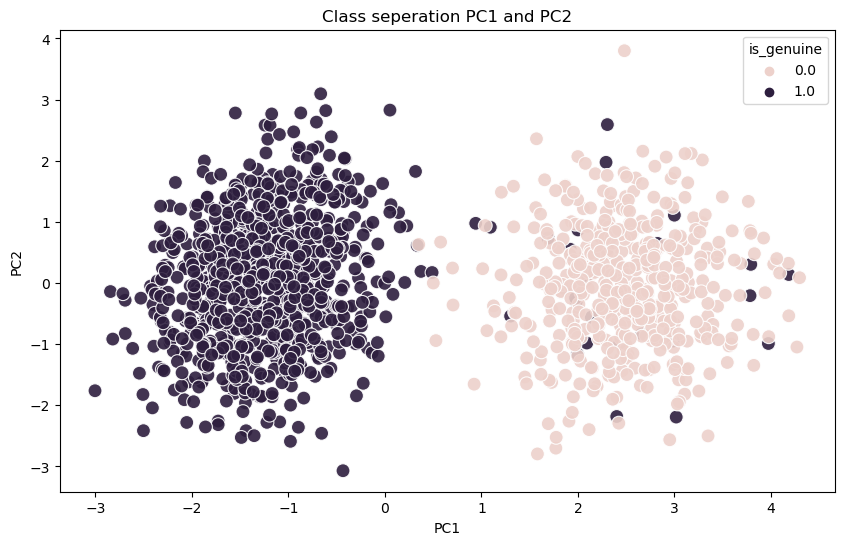

In [63]:
plt.figure(figsize=(10,6))
fig1 = sns.scatterplot(data=df_new,x = df_new["PC1"],y = df_new["PC2"],hue = df["is_genuine"],edgecolors='Green',alpha=0.90,s=100)
plt.title("Class seperation PC1 and PC2")
plt.show()

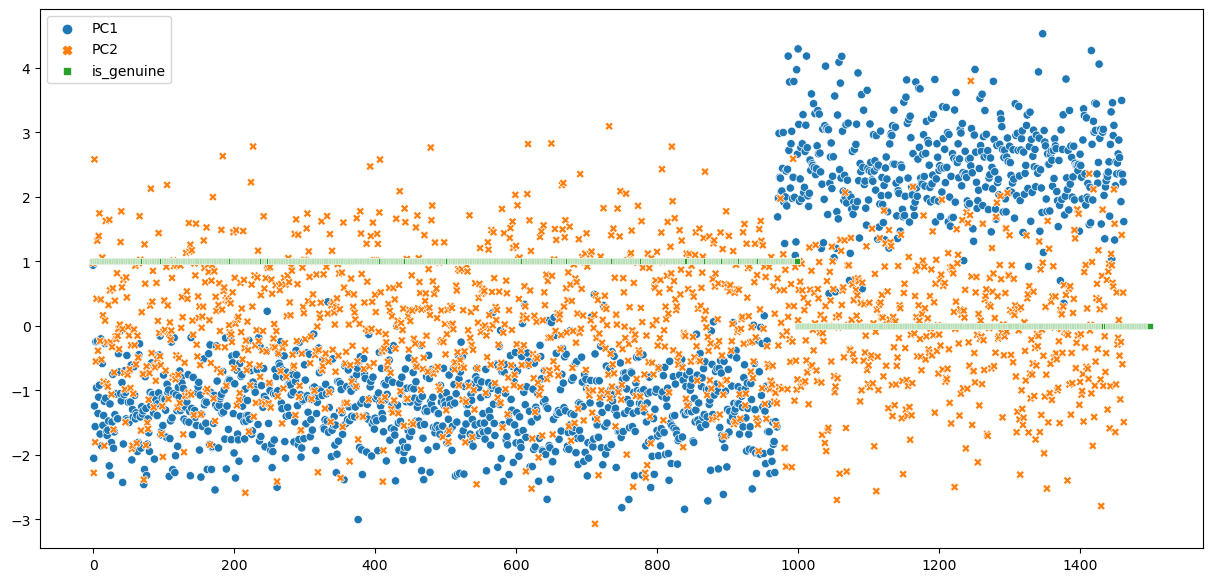

In [64]:
# Visualization of PCAs
fig=plt.figure(figsize=(15,7))
sns.scatterplot(data = df_new)
plt.show()

##### Checking with other Clustering Algorithms

##### 1) K-Mean Clustering

In [65]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(Fake_Bill)
    wcss.append(kmeans.inertia_)

In [66]:
wcss

[2258.644852358168,
 948.7020346072873,
 841.2154622308542,
 756.6406078991921,
 694.2573481981925,
 649.9519652832138,
 614.8317215744654]

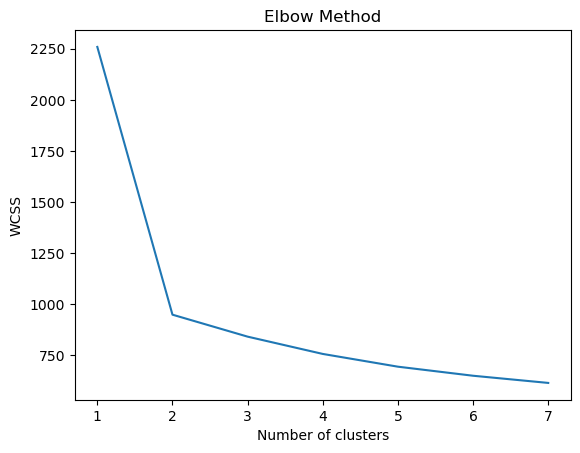

In [67]:
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
#Build Cluster algorithm
cc2 = KMeans(3, random_state=27)
cc2.fit(Fake_Bill)

KMeans(n_clusters=3, random_state=27)

In [69]:
cc2.labels_

array([2, 1, 1, ..., 2, 2, 2])

In [70]:
# Converting array to dataframe
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [71]:
df3 = pd.concat([Fake_Bill,df2],axis=1)
df3.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,clusters
0,171.81,104.86,104.95,4.52,2.89,112.83,2.0
1,171.46,103.36,103.66,3.77,2.99,113.09,1.0
2,172.69,104.48,103.50,4.40,2.94,113.16,1.0
3,171.36,103.91,103.94,3.62,3.01,113.51,1.0
4,171.73,104.28,103.46,4.04,3.48,112.54,1.0


In [72]:
df3.groupby('clusters').agg(['mean'])

,diagonal,height_left,height_right,margin_low,margin_up,length
,mean,mean,mean,mean,mean,mean
clusters,,,,,,
0.0,171.917430,104.158551,104.099065,5.135140,3.328037,111.761636
1.0,171.990011,103.955601,103.811234,4.126709,3.057352,113.189198
2.0,171.889583,104.175492,104.135833,5.155000,3.325606,111.708523


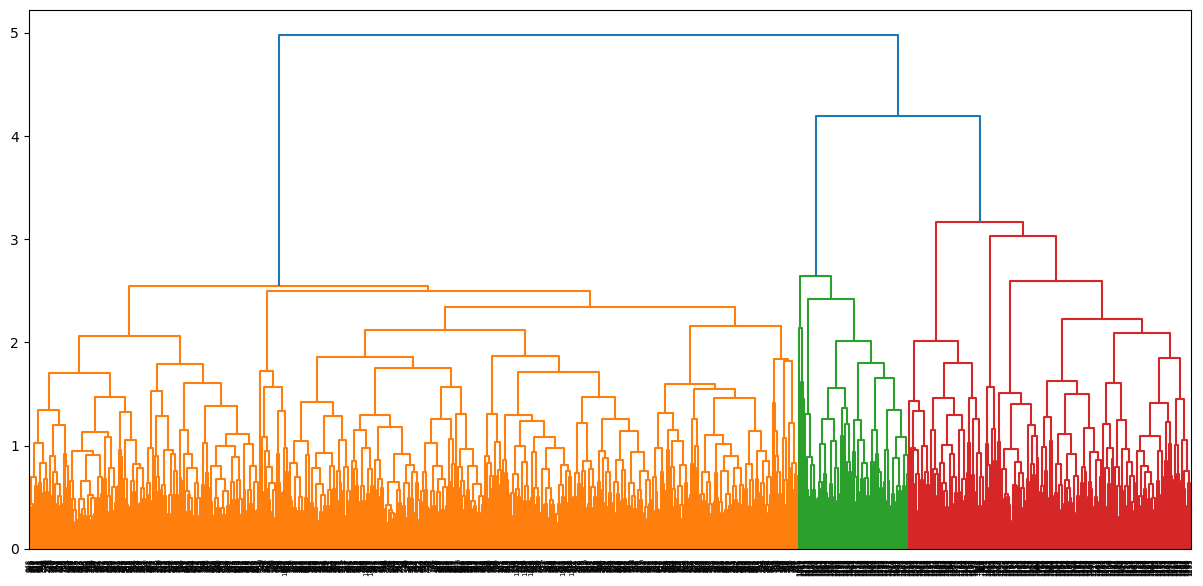

In [73]:
# As we already have normalized data, create Dendrograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,7))
dendrogram=sch.dendrogram(sch.linkage(Fake_Bill,'complete'))